# Text Classification
Data comes from BBC articles which are available to download from Kaggle [here](https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification).

In [58]:
import os
from collections import defaultdict
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# display multiple outputs in same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
path_folder = '../data/bbc_classification/bbc'

# list of folders for each BBC article
list_folders = os.listdir(path = path_folder)
list_folders = [e for e in list_folders if e not in {'.DS_Store', 'README.TXT'}]

# nested list of files within each folder
list_files = []
for folder in list_folders:
    files = os.listdir(path = path_folder + '/' + folder + '/')
    list_files.append(files)
    
# intialise dictionary with keys from list_folders an values from list_files
dict_files = dict(zip(list_folders, list_files))

Now have a dictionary, `dict_files` whose:
 - **Keys**: The folder name the data files belong to
 - **Values**: The data files within each of the sub-folders

What we want to do now is load in each text file as a *single-entry* and assign it the `key` from `dict_files` as the classification. This enables us to create a labelled dataset.

In [65]:
# load data in
df_bbc = pd.DataFrame(columns = ['category', 'article_text'])
for folder in list_folders:
    path_dir = path_folder + '/' + folder
    print(path_dir)
    for file in Path(path_dir).iterdir():
        with open(file, 'rb') as file_open:
            results = defaultdict(list)
            results['category'] = folder
            results['article_text'].append(file_open.read())
    df = pd.DataFrame(results)
    df_bbc = df_bbc.append(df)

../data/bbc_classification/bbc/entertainment
../data/bbc_classification/bbc/business
../data/bbc_classification/bbc/sport
../data/bbc_classification/bbc/politics
../data/bbc_classification/bbc/tech


In [64]:
df_bbc.query('category == "tech"')

,category,article_text
0,tech,b'Musicians to tackle US red tape\n\nMusicians...
1,tech,"b'U2\'s desire to be number one\n\nU2, who hav..."
2,tech,b'Rocker Doherty in on-stage fight\n\nRock sin...
3,tech,"b""Snicket tops US box office chart\n\nThe film..."
4,tech,b'Ocean\'s Twelve raids box office\n\nOcean\'s...
...,...,...
2220,tech,b'Warning over Windows Word files\n\nWriting a...
2221,tech,b'Fast lifts rise into record books\n\nTwo hig...
2222,tech,b'Nintendo adds media playing to DS\n\nNintend...
2223,tech,"b""Fast moving phone viruses appear\n\nSecurity..."


In [52]:
del df, dict_files, file, files, folder, list_files, list_folders, path_dir, path_folder, results

## Pre-processing
Let's start pre-processing our data so that we can have a better dataset to apply models on.

To begin with, let's check our class balances.

<AxesSubplot:>

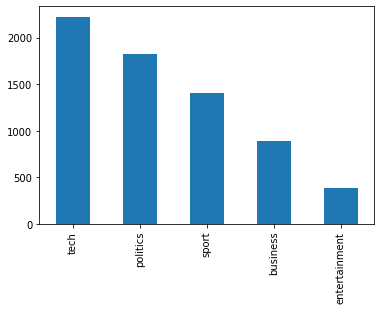

In [56]:
df_bbc['category'].value_counts().plot(kind = 'bar')